# Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

***Dataset***




In [2]:
# Dataset
df = pd.read_csv('https://raw.githubusercontent.com/jhnwlkn/Bangkit/main/submission/data/airquality_data_aotizhongxin.csv')

jumlah baris dalam kolom

In [3]:
print(df.shape)

(35064, 14)


Ringkasan statistik deskriptif

In [5]:
# Menampilkan ringkasan statistik deskriptif
print(df.describe())

              PM2.5          PM10           SO2           NO2            CO  \
count  34139.000000  34346.000000  34129.000000  34041.000000  33288.000000   
mean      82.773611    110.060391     17.375901     59.305833   1262.945145   
std       82.135694     95.223005     22.823017     37.116200   1221.436236   
min        3.000000      2.000000      0.285600      2.000000    100.000000   
25%       22.000000     38.000000      3.000000     30.000000    500.000000   
50%       58.000000     87.000000      9.000000     53.000000    900.000000   
75%      114.000000    155.000000     21.000000     82.000000   1500.000000   
max      898.000000    984.000000    341.000000    290.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33345.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      56.353358     13.584607   1011.846920      3.123062      0.067421   
std       57.916327     11.399097     10.404047    

visualisasi variabel kontinu

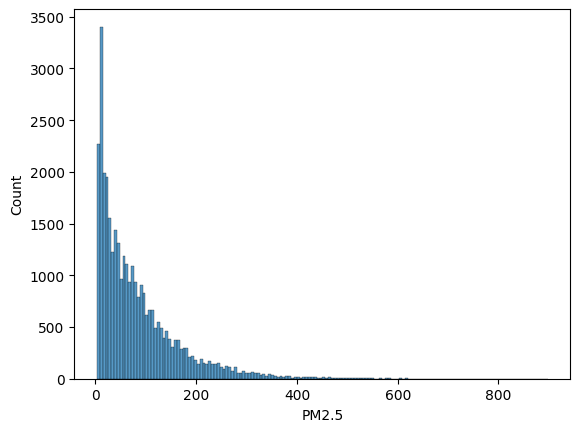

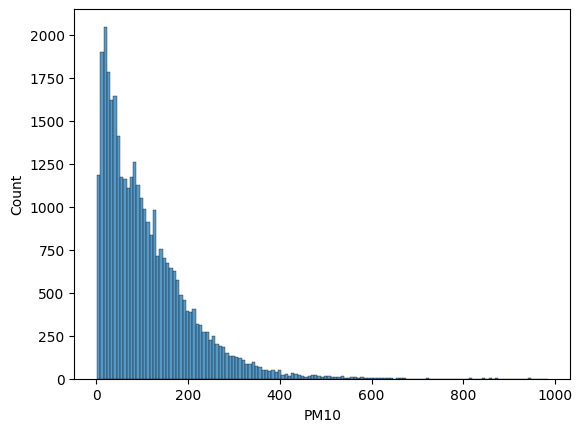

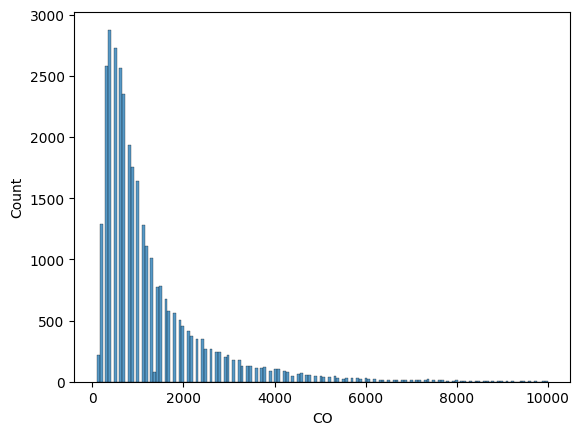

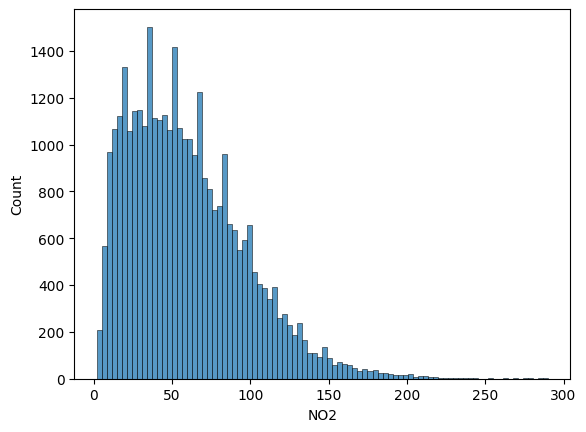

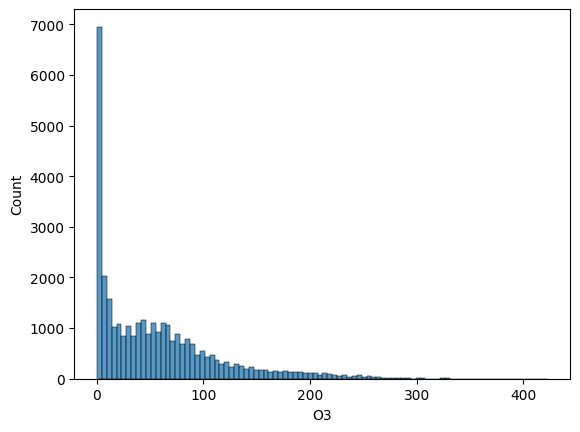

In [6]:
# Visualisasi variabel kontinu
sns.histplot(df['PM2.5'])
plt.show()
sns.histplot(df['PM10'])
plt.show()
sns.histplot(df['CO'])
plt.show()
sns.histplot(df['NO2'])
plt.show()
sns.histplot(df['O3'])
plt.show()

#**Preprocessing**

In [7]:
# Menghapus duplikat
df = df.drop_duplicates()

In [8]:
# Menangani nilai yang hilang
df = df.dropna()

In [9]:
# Pemilihan fitur
features = ['PM2.5', 'PM10', 'CO', 'NO2', 'O3']
X = df[features]

In [10]:
# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Modelling**

In [11]:
# Melakukan klasterisasi KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [12]:
# Menambahkan kolom dengan label klaster
df['cluster'] = kmeans.labels_

Menghitung silhouette score

In [13]:
silhouette_score_val = silhouette_score(X_scaled, kmeans.labels_)
print(f'Silhouette Score: {silhouette_score_val}')

Silhouette Score: 0.32374713081896583


Visualisasi hasil klasterisasi

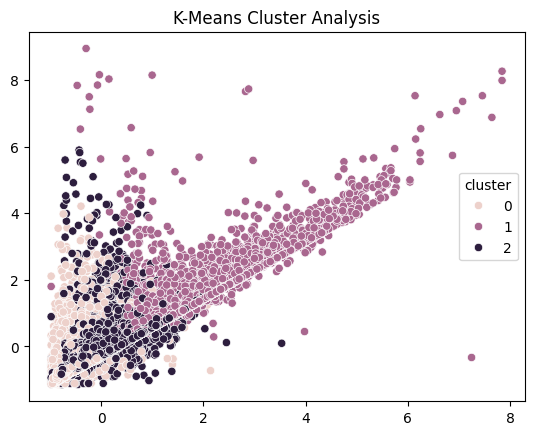

In [14]:
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['cluster'])
plt.title('K-Means Cluster Analysis')
plt.show()

# **Kesimpulan**

   Jadi dapat di lihat dari k-menas cluster analysis di atas dapat di simpulkan bahwa cluster memiliki 3 kelompomk yaitu cluster 0,1,dan 2.Hasil evaluasi dengan silhouette score menunjukkan bahwa klastering yang di hasilkan 0.32 menunjukkan bahwa data dalam cluster memiliki korelasi yang baik


